# Challenge 1: Binary Detection 1

The first step is to import relevant libraries.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import NearestNeighbors
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

The second step is to import data from the given file.

In [3]:
df = pd.DataFrame.from_csv("1challenge.csv")
df0 = df.loc[df['label'] == 0.0]
df1 = df.loc[df['label'] == 1.0]
dftest = df.loc[~((df['label'] == 0.0) | (df['label'] == 1.0))]

One can use the data in their original Pandas DataFrame format, or one can transform these objects into Numpy-arrays.

In [5]:
print(df0.shape)
print(df1.shape)
print(dftest.shape)

(6000, 3)
(4000, 3)
(5000, 3)


In [6]:
TrainingData0 = df0.as_matrix(columns=None)
TrainingData1 = df1.as_matrix(columns=None)
dfTraining = df.loc[((df['label'] == 1.0) | (df['label'] == 0.0))]
dfTest = df.loc[~((df['label'] == 1.0) | (df['label'] == 0.0))]
TestDataX = dftest.as_matrix(columns=['Y0', 'Y1'])
TestDataY = dftest.as_matrix(columns=['label'])

In [7]:
print(dfTraining.shape)
print(dfTest.shape)

(10000, 3)
(5000, 3)


It may be helpful to visualize the data.

In [9]:
XTraining=np.array(dfTraining.ix[:,0:2])



In [10]:
YTraining=np.array(dfTraining.ix[:,2:3])

In [12]:
XTest=np.array(dfTest.ix[:,0:2])

In [13]:
YTest=np.array(dfTest.ix[:,2:3])
YTest

array([[ nan],
       [ nan],
       [ nan],
       ..., 
       [ nan],
       [ nan],
       [ nan]])

In [14]:
knn = KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=3, p=2,
           weights='uniform')

In [15]:
knn.fit(XTraining, YTraining.ravel())
pred = knn.predict(XTest)
print(pred.shape)
YTest
pred

(5000,)


array([ 0.,  0.,  1., ...,  0.,  1.,  0.])

In [28]:
dftest.loc[~((dftest['label'] == 1.0) | (dftest['label'] == 0.0)),'label'] = pred
dfTest0 = dftest.loc[df['label'] == 0.0]
dfTest1 = dftest.loc[df['label'] == 1.0]

In [29]:
print(df0.shape)
print(df1.shape)
print(dfTest0.shape)
print(dfTest1.shape)

(6000, 3)
(4000, 3)
(2959, 3)
(2041, 3)


In [30]:
TestData0 = dfTest0.as_matrix(columns=None)
TestData1 = dfTest1.as_matrix(columns=None)

In [32]:
df0

,Y0,Y1,label
0,-1.086446,-0.896065,0.0
1,-0.306299,-1.339934,0.0
2,-1.206586,-0.641727,0.0
3,1.307946,1.845460,0.0
4,0.829115,-0.023299,0.0
5,-0.208564,-0.916620,0.0
6,-1.074743,-0.086143,0.0
7,1.175839,-1.635092,0.0
8,1.228194,1.076386,0.0
9,0.394773,-0.387701,0.0


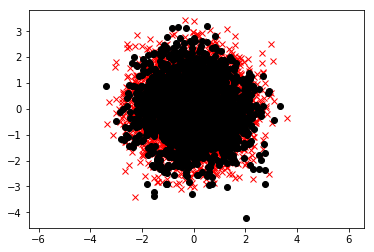

In [19]:
plt.plot(TrainingData0[:,0], TrainingData0[:,1], 'x', color='r')
plt.plot(TestData0[:,0], TestData0[:,1], 'o', color='k')
plt.axis('equal')
plt.show()

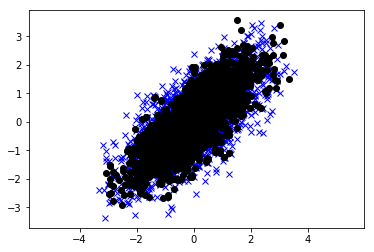

In [20]:
plt.plot(TrainingData1[:,0], TrainingData1[:,1], 'x', color='b')
plt.plot(TestData1[:,0], TestData1[:,1], 'o', color='k')
plt.axis('equal')
plt.show()

In [24]:
df

,Y0,Y1,label
0,-1.086446,-0.896065,0.0
1,-0.306299,-1.339934,0.0
2,-1.206586,-0.641727,0.0
3,1.307946,1.845460,0.0
4,0.829115,-0.023299,0.0
5,-0.208564,-0.916620,0.0
6,-1.074743,-0.086143,0.0
7,1.175839,-1.635092,0.0
8,1.228194,1.076386,0.0
9,0.394773,-0.387701,0.0


After creating an algorithm and generating labels, one should update the original CSV file.

In [22]:
df = pd.concat([df0, df1, dftest], join='outer', ignore_index=True)
df.to_csv("1challenge.csv")